<a href="https://colab.research.google.com/github/amargauge26/fyennlabs_data/blob/main/1_amardeep_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [5]:
data = pd.read_csv('/content/drive/MyDrive/SAMPLE_DATASETS/fyenn labs/mcdonalds.csv')

In [6]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [8]:
print(pd.isnull(data).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [9]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [11]:
yes_no_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
data[yes_no_columns] = data[yes_no_columns].replace({'Yes': 1, 'No': 0})


<ipython-input-11-f267e7b9617c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[yes_no_columns] = data[yes_no_columns].replace({'Yes': 1, 'No': 0})


In [12]:
gender_mapping = {'Female': 0, 'Male': 1}
data['Gender'] = data['Gender'].map(gender_mapping)

In [13]:
data = data.drop(columns=['VisitFrequency'])


In [14]:
data['Like'] = pd.to_numeric(data['Like'], errors='coerce')
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')


In [15]:
data.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852,0.597178,-0.281653,-0.062545
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797,0.224790,-0.070597,-0.041402
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834,-0.035681,0.146217,0.051015
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054,-0.123788,-0.139254,-0.059707
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879,-0.216649,-0.233554,0.021801
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993,0.070421,-0.020558,-0.049027
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602,0.079037,0.016958,-0.116050
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086,0.559558,-0.194576,-0.044385
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748,-0.079353,-0.070851,0.144113
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722,0.193291,0.021366,-0.042455


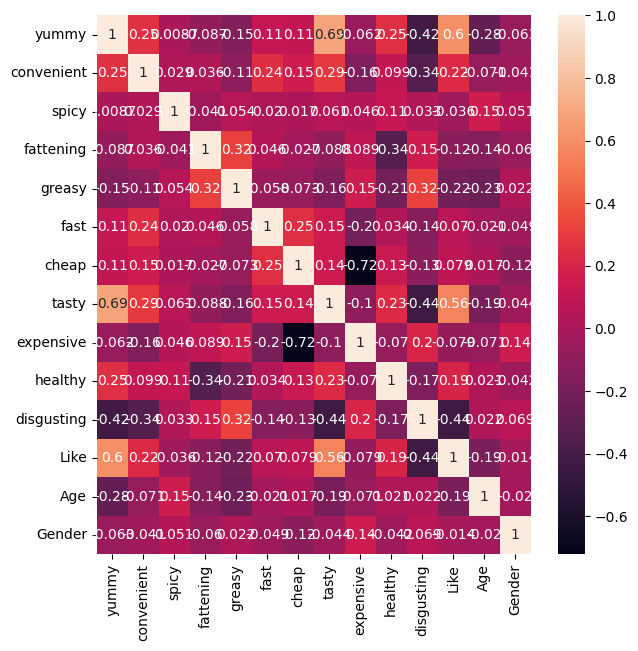

In [16]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True)
plt.show()


In [ ]:
#Perceptual attributes now we have extracted the things we need to wrok with

In [17]:
data = data[['yummy', 'convenient', 'spicy', 'healthy', 'cheap']]

In [18]:
data


,yummy,convenient,spicy,healthy,cheap
0,0,1,0,0,1
1,1,1,0,0,1
2,0,1,1,1,0
3,1,1,0,0,1
4,0,1,0,1,1
...,...,...,...,...,...
1448,0,1,0,0,0
1449,1,1,0,1,1
1450,1,1,0,0,0
1451,1,1,0,1,1


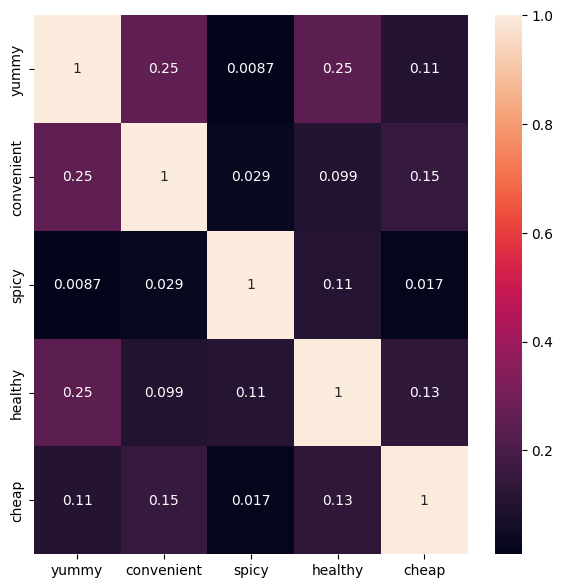

In [19]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [22]:
wcss = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)  # Set random_state for reproducibility
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

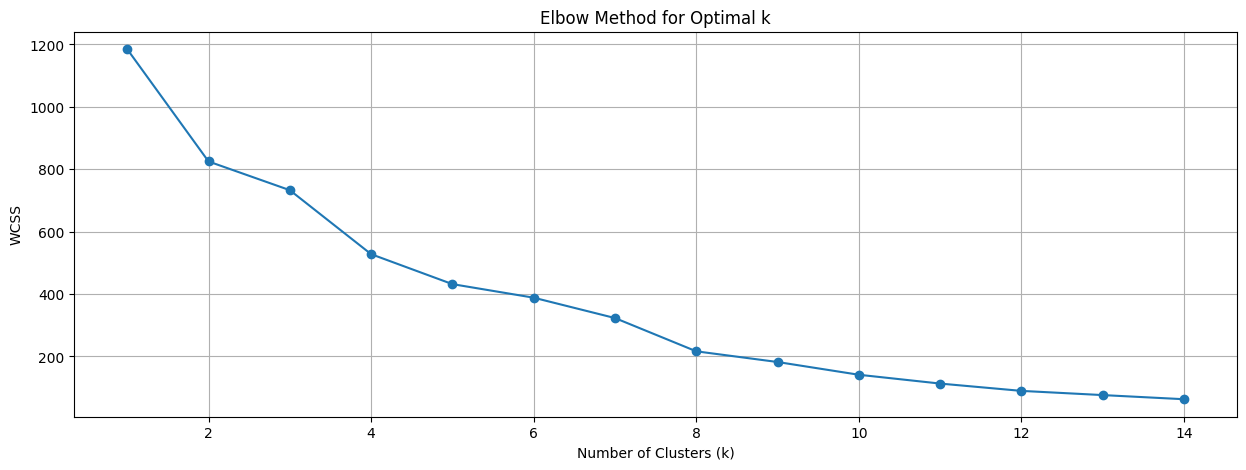

In [23]:
plt.figure(figsize=(15, 5))
plt.plot(range(1, 15), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.grid()
plt.show()


In [25]:
optimal_k = 5  # Replace with the elbow value you found
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(data)

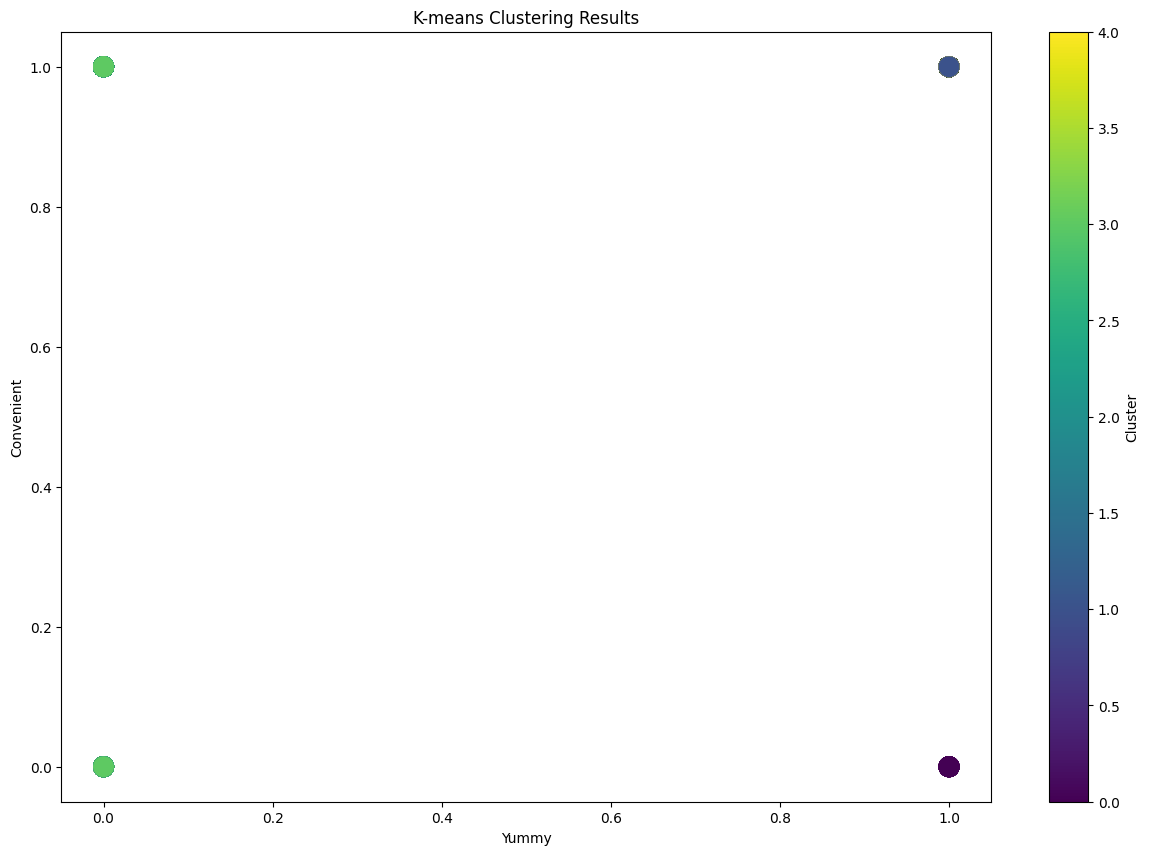

In [26]:
plt.figure(figsize=(15, 10))
plt.scatter(data['yummy'], data['convenient'], c=data['kmeans_cluster'], s=200, cmap='viridis')
plt.xlabel("Yummy")
plt.ylabel("Convenient")
plt.title("K-means Clustering Results")
plt.colorbar(label='Cluster')
plt.show()

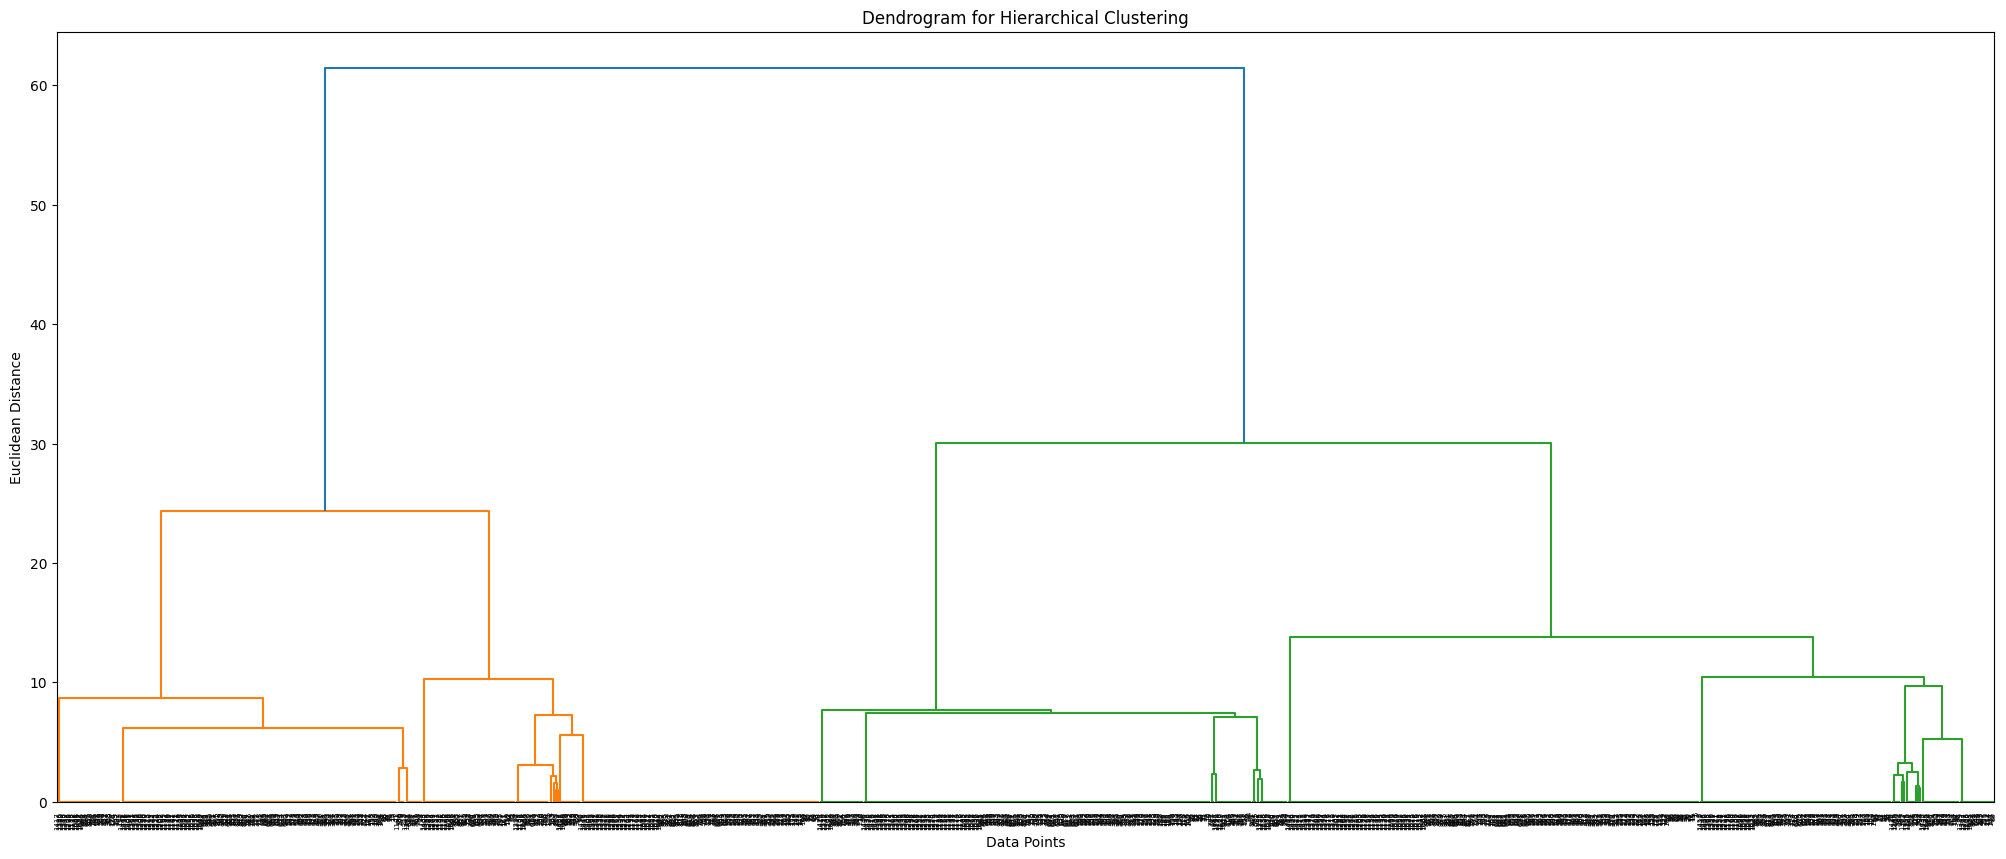

In [28]:
merg = linkage(data, method="ward")
plt.figure(figsize=(25, 10))
dendrogram(merg, leaf_rotation=90)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()


In [30]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=optimal_k,linkage="ward")
data['hierarchical_cluster'] = hierarchical_cluster.fit_predict(data)

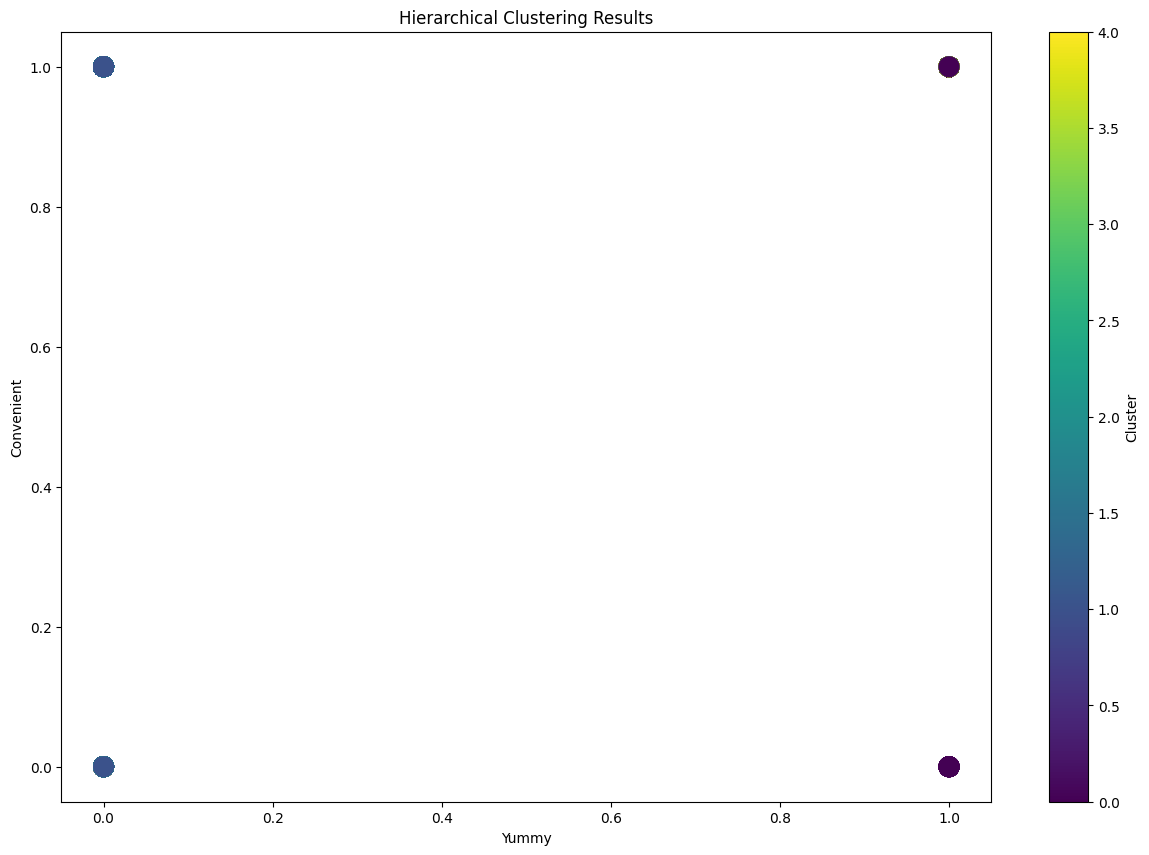

In [31]:
plt.figure(figsize=(15, 10))
plt.scatter(data['yummy'], data['convenient'], c=data['hierarchical_cluster'], s=200, cmap='viridis')
plt.xlabel("Yummy")
plt.ylabel("Convenient")
plt.title("Hierarchical Clustering Results")
plt.colorbar(label='Cluster')
plt.show()